In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
import os

In [2]:
archivo = fits.open('TCampo_b279.fits')
archivo1 = fits.open('PVariablesb279.fits')
HJD=archivo[1].data
Error=archivo1[4].data
Ks=archivo1[3].data
archivo1.info()

Filename: PVariablesb279.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  KS_ALE        1 ImageHDU         7   (1280954,)   float64   
  2  EKS_ALE       1 ImageHDU         8   (68, 100000)   float64   
  3  KS_PV         1 ImageHDU         8   (68, 181)   float64   
  4  EKS_PV        1 ImageHDU         8   (68, 181)   float64   


In [3]:
print(Error[0])
print(Ks[0])
print(HJD)

[0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.011   nan   nan 0.018 0.012 0.01
   nan 0.01  0.012 0.012 0.01  0.013 0.011   nan]
[12.973 12.92  12.913 12.864 12.973 12.836 12.89  12.985 12.869 12.891
 12.899 12.892 12.917 12.884 12.868 12.907 12.911 12.865 12.916 12.854
 12.909 12.912 12.952 12.913 13.184 12.918 12.985 12.905 12.936 12.895
 12.876 12.896 12.938 12.903 12.884 12.865 12.883 12.88  12.964 12.893
 12.929 12.908 12.878 12.884 12.927 12.902 12.907 12.965 12.889 12.888
 12.886 12.91  12.922 12.893 12.86     nan    nan 13.434 12.953 12.918
    nan 12.905 12.991 12.846 12.924 13.004 12.892    nan]
[2455309.7589699  2455818.52390016 2456160.60001347 2456484.58745569
 2456133.71639878 2456477.63061378 24

In [8]:
def eliminar_nan(error, ks, HJD):
    indices_validos = ~np.isnan(ks)
    error_filtrado = [error[i] for i in range(len(ks)) if indices_validos[i]]
    ks_filtrado = [ks[i] for i in range(len(ks)) if indices_validos[i]]
    HJD_filtrado = [HJD[i] for i in range(len(ks)) if indices_validos[i]]
    return error_filtrado, ks_filtrado, np.round(HJD_filtrado,8)

ks_nan=[]
error_nan=[]
HJD_na=[]
y=0
while y<len(Ks):
    error_filtrado, ks_filtrado, HJD_filtrado = eliminar_nan(Error[y], Ks[y], HJD-2400000)
    ks_nan.append(ks_filtrado)
    error_nan.append(error_filtrado)
    HJD_na.append(HJD_filtrado)
    y+=1
print(error_nan[-1])
print(ks_nan[-1])
print(HJD_na[-1])

[0.099, 0.1, 0.094, 0.081, 0.1, 0.095, 0.097, 0.102, 0.102, 0.118, 0.106, 0.141, 0.103, 0.094, 0.064, 0.139, 0.112, 0.061, 0.083, 0.071, 0.061, 0.099, 0.122, 0.089, 0.103, 0.098, 0.119, 0.107, 0.073, 0.106, 0.075, 0.113, 0.102, 0.144, 0.076, 0.077, 0.064, 0.08, 0.129, 0.118, 0.13, 0.132, 0.053, 0.111, 0.116, 0.071, 0.147, 0.137, 0.125, 0.137, 0.083, 0.128, 0.14, 0.143, 0.154, 0.152, 0.1, 0.22, 0.207, 0.08, 0.095, 0.074, 0.167, 0.163, 0.139, 0.107, 0.193]
[15.859, 15.726, 15.758, 15.534, 15.802, 15.756, 15.758, 15.826, 15.787, 15.944, 15.834, 16.149, 15.795, 15.707, 15.223, 16.104, 15.908, 15.201, 15.523, 15.357, 15.172, 15.728, 15.94, 15.604, 15.743, 15.675, 15.88, 15.772, 15.263, 15.794, 15.415, 15.779, 15.707, 16.084, 15.364, 15.374, 15.139, 15.413, 15.911, 15.89, 15.975, 15.975, 14.912, 15.763, 15.872, 15.278, 16.075, 16.016, 15.845, 16.0, 15.383, 15.905, 15.926, 15.981, 16.011, 16.076, 15.563, 16.217, 16.17, 15.242, 15.373, 15.127, 16.09, 15.92, 15.945, 15.437, 16.09]
[55309.758969

In [14]:
x=0
while x<len(ks_nan):
    serie = ks_nan[x]
    erro = error_nan[x]
    hjd = HJD_na[x]

    # Definir el nombre del archivo de texto
    nombre_archivo = "Datosb279"+str(x)+".txt"

    with open(nombre_archivo, "w") as archivo:
        for h, s, e in zip(hjd, serie, erro):
            archivo.write("{:<15} {:<10} {:<6}\n".format(h, s, e))
    x+=1
print("hecho")

hecho


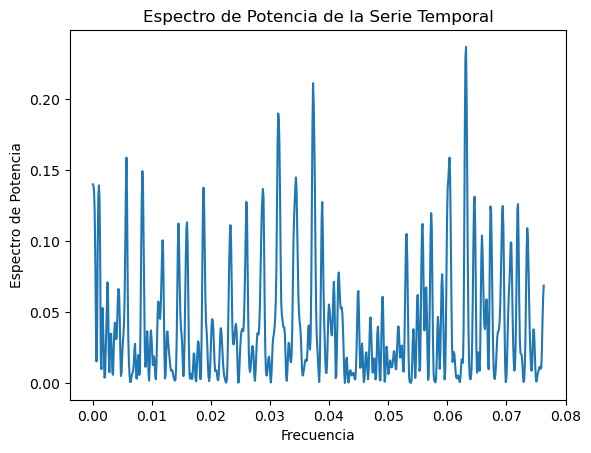

In [5]:
S=ks_nan[3]
Date=HJD_na[3]
# Calcular el espectro de potencia utilizando Lomb-Scargle
frequency, power = LombScargle(Date, S).autopower()

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal')
# Guarda la gráfica en un archivo
plt.savefig('serie_potencias2_b279.png')

plt.show()

In [6]:
# Definir el número de picos que deseas identificar
n_picos = 50 # Por ejemplo, para identificar los tres picos más prominentes

# Encontrar los índices de los picos en el espectro de potencia
indices_picos = np.argpartition(power, -n_picos)[-n_picos:]
indices_picos_ordenados = indices_picos[np.argsort(-power[indices_picos])]

# Obtener las frecuencias y potencias de los picos
frecuencias_picos = frequency[indices_picos_ordenados]
potencias_picos = power[indices_picos_ordenados]

# Calcular los períodos correspondientes a las frecuencias de los picos
periodos_picos = 1 / frecuencias_picos

# Imprimir los períodos correspondientes a los picos
for i, periodo in enumerate(periodos_picos):
    print(f"Pico {i+1}: Periodo = {periodo:.2f} días, Potencia = {potencias_picos[i]:.2f}")


Pico 1: Periodo = 15.83 días, Potencia = 0.24
Pico 2: Periodo = 15.86 días, Potencia = 0.23
Pico 3: Periodo = 26.81 días, Potencia = 0.21
Pico 4: Periodo = 15.80 días, Potencia = 0.20
Pico 5: Periodo = 26.73 días, Potencia = 0.20
Pico 6: Periodo = 31.84 días, Potencia = 0.19
Pico 7: Periodo = 31.74 días, Potencia = 0.19
Pico 8: Periodo = 26.88 días, Potencia = 0.18
Pico 9: Periodo = 15.88 días, Potencia = 0.18
Pico 10: Periodo = 26.66 días, Potencia = 0.17
Pico 11: Periodo = 31.95 días, Potencia = 0.17
Pico 12: Periodo = 31.63 días, Potencia = 0.17
Pico 13: Periodo = 16.56 días, Potencia = 0.16
Pico 14: Periodo = 174.13 días, Potencia = 0.16
Pico 15: Periodo = 16.59 días, Potencia = 0.15
Pico 16: Periodo = 118.58 días, Potencia = 0.15
Pico 17: Periodo = 29.07 días, Potencia = 0.14
Pico 18: Periodo = 16.53 días, Potencia = 0.14
Pico 19: Periodo = 16.62 días, Potencia = 0.14
Pico 20: Periodo = 15.78 días, Potencia = 0.14
Pico 21: Periodo = 19328.49 días, Potencia = 0.14
Pico 22: Periodo 

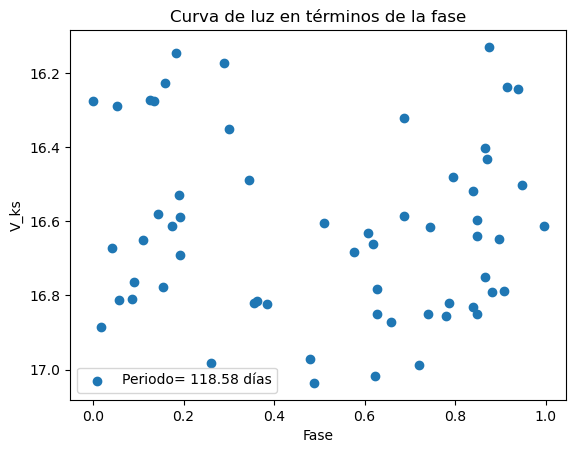

In [7]:
P=118.58
t_0 = Date[0]

# 3. Calcular la fase para cada punto de tus datos
fase = ((Date - t_0) / P) - np.floor((Date - t_0) / P)
plt.scatter(fase, S)
plt.xlabel('Fase')
plt.ylabel('V_ks')
# Invertir el eje y
plt.gca().invert_yaxis()
plt.title('Curva de luz en términos de la fase')
# Muestra la leyenda con el período promedio
plt.legend(['Periodo= {:.2f} días'.format(P)])
# Guarda la gráfica en un archivo
plt.savefig('Curva3_b279.png')
plt.show()